<a href="https://colab.research.google.com/github/Mjcherono/Employee-Attrition/blob/master/Team_Tenet_DSCore_Project_on_EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Introduction
######Research by Team Tenet on Employee attrition dataset prepared by IBM Data Scientist to confirm the claim that monthly incomes earned by attritioned employees with a masters degree is not different from that earned by those with a bachelors degree

###Objectives
1.   To look into the differences of the monthly income means for attritioned and non attritioned employees with different education levels.
2.   To establish the education level that had the most attritioned employees.
3.   To determine the monthly income earned by  gender of attritioned employees.


###Hypothesis
######H0: There is a difference between monthly incomes made by attritioned employees with a masters degree and those with a bachelors degree.
######H1: There is no difference between monthly incomes made by attritioned employees with a masters degree and those with a bachelors degree.

###Libraries

In [51]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


###Loading Dataset

In [124]:
#Read_File
employee_dataset = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_dataset.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [53]:
#Dataset Preview
employee_dataset.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [54]:
employee_dataset.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [55]:
employee_dataset['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [56]:
employee_dataset['StandardHours'].unique()

array([80])

In [57]:
#Size of the Dataset
employee_dataset.shape

(1470, 35)

In [58]:
#Description of the Dataset
employee_dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [59]:
##Datatypes in the Dataset
employee_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [60]:
#Checking Column Names
employee_dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [61]:
#Number of Unique Values in Columns
employee_dataset.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

###DATA PREPARATION

In [62]:
#Checking Null Values in the Dataset
employee_dataset.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [63]:
#Checking for Duplicates in the Dataset
employee_dataset.duplicated().sum()

0

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


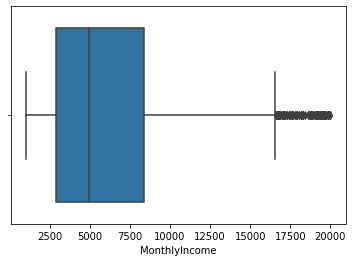

In [64]:
#Checking for Outliers in the Dataset
#employee_dataset.boxplot()
sns.boxplot(employee_dataset["MonthlyIncome"])

In [65]:
#Doing away with the outliers
q1, q3 = np.percentile(employee_dataset['MonthlyIncome'], [25, 75]) 
iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
employee_dataset = employee_dataset[~(employee_dataset['MonthlyIncome']>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


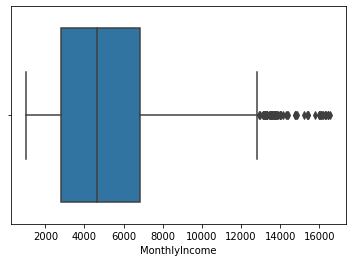

In [66]:
sns.boxplot(employee_dataset["MonthlyIncome"])

In [67]:
#Doing away with the outliers
q1, q3 = np.percentile(employee_dataset['MonthlyIncome'], [25, 75]) 
iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
employee_dataset = employee_dataset[~(employee_dataset['MonthlyIncome']>upper_bound)]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


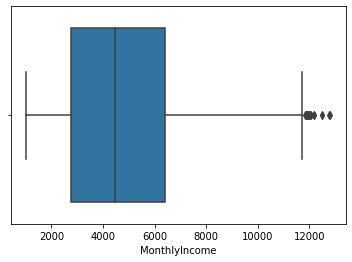

In [68]:
sns.boxplot(employee_dataset["MonthlyIncome"])

In [69]:
employee_dataset.shape

(1283, 35)

In [70]:
employee_dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [71]:
#Dropping Columns to remain with variables related to income and Attrition
employee_dataset.drop(['EmployeeCount', 'Over18','RelationshipSatisfaction','StockOptionLevel','BusinessTravel','DailyRate','MaritalStatus','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                       'StandardHours','TotalWorkingYears','TrainingTimesLastYear','PerformanceRating','YearsAtCompany','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'], axis=1, inplace=True)

In [72]:
employee_dataset.shape

(1283, 16)

###EXPLORATORY DATA ANALYSIS

####Univariate Analysis

In [73]:
employee_dataset

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime
0,41,Yes,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,5993,Yes
1,49,No,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,5130,No
2,37,Yes,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,2090,Yes
3,33,No,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,2909,Yes
4,27,No,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,3468,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,2571,No
1466,39,No,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,9991,No
1467,27,No,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,6142,Yes
1468,49,No,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,5390,No


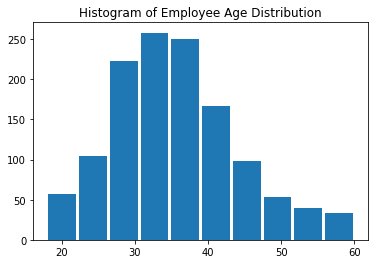

In [74]:
#Creating Employee Age Histogram
employee_ages = [employee_dataset.Age]
bins            = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130]

plt.hist(employee_ages, bins=10, histtype='bar', rwidth=0.9)

#plt.xlabel('Age')
#plt.ylabel('Frequency')
plt.title('Histogram of Employee Age Distribution') 
plt.show()

In [75]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

In [76]:
employee_dataset.Education.unique()

array([2, 1, 4, 3, 5])

In [77]:
#Renaming Values in the Education Column
employee_dataset['Education'] = employee_dataset['Education'].map({1: 'Below_College', 2: 'College', 3: 'Bachelor',4: 'Masters',5: 'Doctor'})
employee_dataset.Education.unique()


array(['College', 'Below_College', 'Masters', 'Bachelor', 'Doctor'],
      dtype=object)

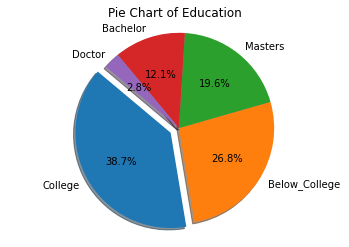

In [78]:
#Percentage Distribution of Education
education = employee_dataset['Education'].value_counts()
labels = employee_dataset.Education.unique()
explode = (0.1, 0, 0, 0, 0) 
plt.pie(education, labels = labels, explode = explode,autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.axis('equal')
plt.title('Pie Chart of Education')
plt.show()

Observation: The highest percentage is 38.7% of the employees who happened to have attended college

Observation: yes represents the bigger percentage with 82.3% ,No  = 17.7%


In [79]:
employee_dataset.head(3)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime
0,41,Yes,Sales,1,College,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,5993,Yes
1,49,No,Research & Development,8,Below_College,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,5130,No
2,37,Yes,Research & Development,2,College,Other,4,4,Male,92,2,1,Laboratory Technician,3,2090,Yes


In [80]:
employee_dataset.to_excel(r'C:\Users\chero\Documents\Moringa\Module 1.Project\Employee Attrition\HRAttrition_cleaned.xlsx', sheet_name='HRAttrition_cleaned', index = False)

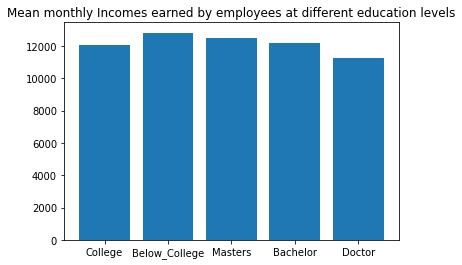

In [81]:
#bar graph of  monthly income earned by employees at diffrent education levels
x = employee_dataset.Education
y = employee_dataset.MonthlyIncome
 

plt.bar(x, y)
#plt.xlabel("Education")
#plt.ylabel("Monthly Income")
plt.title("Mean monthly Incomes earned by employees at different education levels")
plt.show()

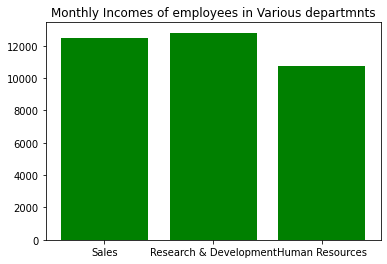

In [82]:
#bar graph of  monthly income per department
x = employee_dataset.Department
y = employee_dataset.MonthlyIncome
 

plt.bar(x, y, color='green')
#plt.xlabel("Departments")
#plt.ylabel("Monthly Income")
plt.title("Monthly Incomes of employees in Various departmnts")
plt.show()

Observation:The research and development department had the highest number of employees.


Attritioned cases

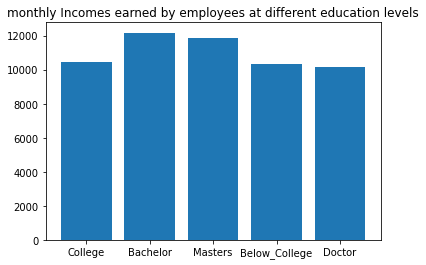

In [83]:
#bar graph of  monthly income earned by attritioned employees at diffrent education levels
attritioned_employees =employee_dataset[['Education','MonthlyIncome']][employee_dataset['Attrition']=='Yes']

x = attritioned_employees.Education
y = attritioned_employees.MonthlyIncome
 

plt.bar(x, y)
#plt.xlabel("Education")
#plt.ylabel("Monthly Income")
plt.title("monthly Incomes earned by employees at different education levels")
plt.show()

In [84]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

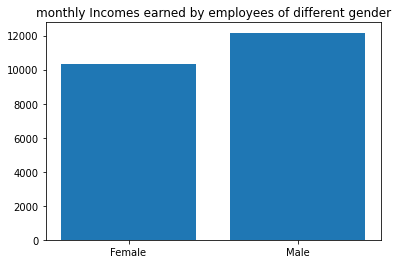

In [85]:
#bar graph of  monthly income earned by attritioned employees of different genders
attritioned_employees =employee_dataset[['Gender','MonthlyIncome']][employee_dataset['Attrition']=='Yes']

x = attritioned_employees.Gender
y = attritioned_employees.MonthlyIncome
 

plt.bar(x, y)
#plt.xlabel("Education")
#plt.ylabel("Monthly Income")
plt.title("monthly Incomes earned by employees of different gender")
plt.show()

Observation: Male employees earned more than the female employees in the company


In [86]:
#checking for measures of central tendency of relevant columns
employee_dataset1 = employee_dataset[['Age','DistanceFromHome','MonthlyIncome']]
employee_dataset1.describe()

,Age,DistanceFromHome,MonthlyIncome
count,1283.000000,1283.000000,1283.000000
mean,35.457521,9.283710,5004.074045
std,8.518880,8.072832,2636.913469
min,18.000000,1.000000,1009.000000
25%,29.000000,2.000000,2773.500000
50%,34.000000,7.000000,4449.000000
75%,40.000000,14.000000,6390.500000
max,60.000000,29.000000,12808.000000


####Bivariate Analysis

In [87]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

In [88]:
employee_dataset_corr = employee_dataset.copy()

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

employee_dataset_corr.Attrition=le.fit_transform(employee_dataset_corr.Attrition)

In [90]:
#Checking for correlations between age and attrition

coeff = employee_dataset_corr["Age"].corr(employee_dataset_corr["Attrition"])
print(coeff)

-0.1323636558526572


In [91]:
#Checking for correlations between income and attrition
coeff = employee_dataset_corr["MonthlyIncome"].corr(employee_dataset_corr["Attrition"])
print(coeff)

-0.12854759686605832


Observation: correlation is at -0.1 which is too low.


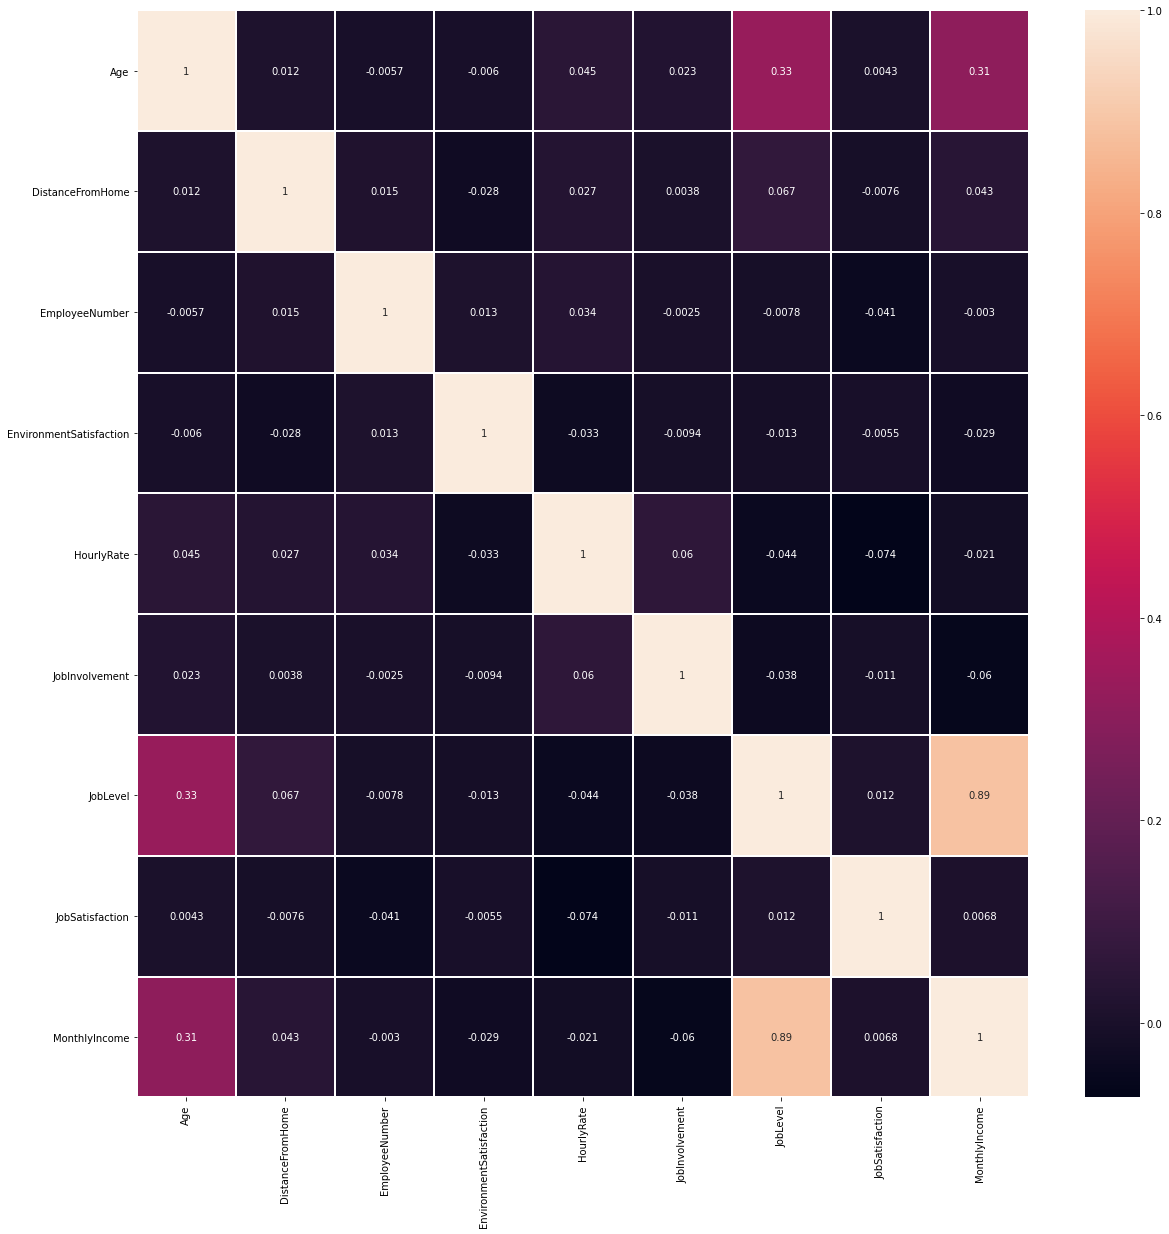

In [93]:
#Checking for Correlations between variables in a dataset
corrMatrix = employee_dataset.corr()
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True, linewidths=1)
plt.show()

In [94]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

               EmployeeNumber
Education                    
Bachelor                  404
Below_College             126
College                   207
Doctor                     31
Masters                   288
               EmployeeNumber
Education                    
Bachelor                   93
Below_College              29
College                    44
Doctor                      5
Masters                    56


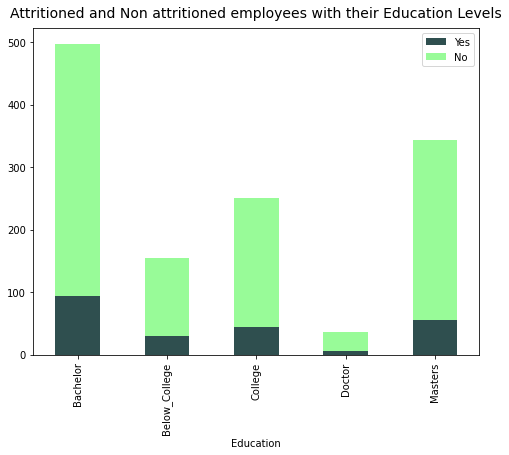

In [95]:
#stacked bars of level of education and whether the employee was attritioned or not
attritioned=employee_dataset[['Education','EmployeeNumber']][employee_dataset['Attrition']=='Yes']
not_attritioned=employee_dataset[['Education','EmployeeNumber']][employee_dataset['Attrition']=='No']

attritioned = attritioned.groupby(['Education']).count()
not_attritioned = not_attritioned.groupby(['Education']).count()
print(not_attritioned)
print(attritioned)

attritioned.rename(columns = {'EmployeeNumber':'Yes'}, inplace = True)
not_attritioned.rename(columns = {'EmployeeNumber':'No'}, inplace = True)
attritioned
#not_attritioned

df = pd.merge(attritioned,not_attritioned, right_on='Education',left_on='Education')
df

color = ["darkslategray","palegreen"]

df.plot(kind='bar', figsize=(8, 6),color= color, stacked=True)
plt.title("Attritioned and Non attritioned employees with their Education Levels", fontsize=14, y=1.015)
plt.ylabel='Number Employees'
plt.xlabel=('Level of Education')
plt.show()


Observation: Bachelor had the highest number of employees followed by Master's, College, Below College and finally those with a Doctorate.

In [96]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

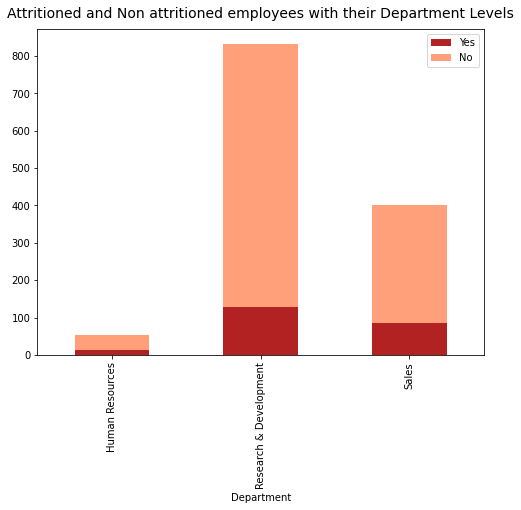

In [97]:
#stacked bars of department and whether the employee was attritioned
attritioned=employee_dataset[['Department','EmployeeNumber']][employee_dataset['Attrition']=='Yes']
not_attritioned=employee_dataset[['Department','EmployeeNumber']][employee_dataset['Attrition']=='No']

attritioned = attritioned.groupby(['Department']).count()
not_attritioned = not_attritioned.groupby(['Department']).count()
not_attritioned

attritioned.rename(columns = {'EmployeeNumber':'Yes'}, inplace = True)
not_attritioned.rename(columns = {'EmployeeNumber':'No'}, inplace = True)
attritioned
not_attritioned

df = pd.merge(attritioned,not_attritioned, right_on='Department',left_on='Department')
df.columns

color = ["firebrick",'lightsalmon']

df.plot(kind='bar', figsize=(8, 6),color= color, stacked=True)
plt.title("Attritioned and Non attritioned employees with their Department Levels", fontsize=14, y=1.015)
plt.ylabel='Number Employees'
plt.xlabel=('Department')
plt.show()


Observation: Research department had the highest number of employees with low attrition

In [98]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

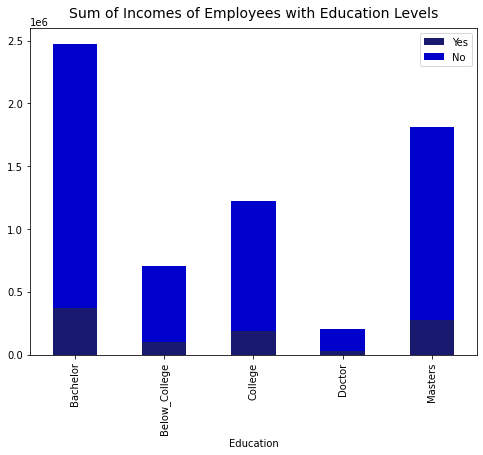

In [99]:
#stacked bars of incomes,level of education and whether the employee was attritioned
attritioned=employee_dataset[['Education','MonthlyIncome']][employee_dataset['Attrition']=='Yes']
not_attritioned=employee_dataset[['Education','MonthlyIncome']][employee_dataset['Attrition']=='No']

attritioned = attritioned.groupby(['Education']).sum()
not_attritioned = not_attritioned.groupby(['Education']).sum()
not_attritioned

attritioned.rename(columns = {'MonthlyIncome':'Yes'}, inplace = True)
not_attritioned.rename(columns = {'MonthlyIncome':'No'}, inplace = True)
attritioned
not_attritioned

df = pd.merge(attritioned,not_attritioned, right_on='Education',left_on='Education')
df.columns

color = ["midnightblue",'mediumblue']

df.plot(kind='bar', figsize=(8, 6),color= color, stacked=True)
plt.title("Sum of Incomes of Employees with Education Levels", fontsize=14, y=1.015)
plt.ylabel='MonthlyIncome'
plt.xlabel=('Education')
plt.show()


Observation: Highest sum of income levels was observed among the employees with Bachelor’s degree and lowest was those with a doctorate.

In [100]:
employee_dataset.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [101]:
employee_dataset.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'OverTime'],
      dtype='object')

####Multivariate Analysis

#####Applying PCA on our dataset 

In [102]:
#Dataset
employee_dataset_pca = employee_dataset
employee_dataset_pca.head(3)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime
0,41,Yes,Sales,1,College,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,5993,Yes
1,49,No,Research & Development,8,Below_College,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,5130,No
2,37,Yes,Research & Development,2,College,Other,4,4,Male,92,2,1,Laboratory Technician,3,2090,Yes


In [103]:
#Drop employee Number
employee_dataset_pca = employee_dataset_pca.drop(['EmployeeNumber'], 1)


In [104]:
#Label Encode Dataset categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

employee_dataset_pca.Attrition=le.fit_transform(employee_dataset_pca.Attrition)
employee_dataset_pca.Department=le.fit_transform(employee_dataset_pca.Department)
employee_dataset_pca.Education=le.fit_transform(employee_dataset_pca.Education)
employee_dataset_pca.EducationField=le.fit_transform(employee_dataset_pca.EducationField)
employee_dataset_pca.Gender=le.fit_transform(employee_dataset_pca.Gender)
employee_dataset_pca.JobRole=le.fit_transform(employee_dataset_pca.JobRole)
employee_dataset_pca.OverTime=le.fit_transform(employee_dataset_pca.OverTime)


In [105]:
#Review of dataset
employee_dataset_pca.head(3)

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime
0,41,1,2,1,2,1,2,0,94,3,2,7,4,5993,1
1,49,0,1,8,1,1,3,1,61,2,2,6,2,5130,0
2,37,1,1,2,2,4,4,1,92,2,1,2,3,2090,1


In [106]:
#Preprocesing
#separating the dataset into features and a label
X = employee_dataset_pca.drop('Attrition', 1)
y = employee_dataset_pca['Attrition']

In [107]:
#splitting dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [108]:
# Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [109]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [110]:
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15841465])

In [111]:
#Training and making predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


In [112]:
##7. Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[214   0]
 [ 43   0]]
Accuracy 0.8326848249027238


###Hypothesis Testing

######  
######H0: There is no difference between monthly incomes made by attritioned employees with a masters degree and those with a bachelors degree.
######H1: There is a difference between monthly incomes made by attritioned employees with a masters degree and those with a bachelors degree.

In [113]:
#Our focus will be on attritioned employees with certain education levels
attritioned_employees = employee_dataset[['Education','MonthlyIncome']][employee_dataset['Attrition']=='Yes']
attritioned_employees

,Education,MonthlyIncome
0,College,5993
2,College,2090
14,Bachelor,2028
21,Masters,3407
24,Below_College,2960
...,...,...
1438,Bachelor,1790
1442,Masters,4787
1444,College,2339
1452,Masters,6728


In [114]:
#Grouping according to education levels, 
#this gives the population mean of earnings of employees with cetrain education levels
attritioned_employees_means = attritioned_employees.groupby('Education')['MonthlyIncome'].mean()
attritioned_employees_means

Education
Bachelor         4022.989247
Below_College    3507.241379
College          4282.545455
Doctor           5850.200000
Masters          4937.464286
Name: MonthlyIncome, dtype: float64

In [115]:
#Reducing our dataset to just employees with Masters and those with bachelors
attritioned_employees_bachelors = employee_dataset[['Education','MonthlyIncome']][employee_dataset['Education']=='Bachelor']
attritioned_employees_Masters = employee_dataset[['Education','MonthlyIncome']][employee_dataset['Education']=='Masters']
attritioned_employees_Masters

#renaming column names
attritioned_employees_bachelors.rename(columns = {'MonthlyIncome':'MonthlyIncome_bsc'}, inplace = True)
attritioned_employees_Masters.rename(columns = {'MonthlyIncome':'MonthlyIncome_ms'}, inplace = True)

print(attritioned_employees_bachelors)
print(attritioned_employees_Masters)

     Education  MonthlyIncome_bsc
6     Bachelor               2670
8     Bachelor               9526
9     Bachelor               5237
10    Bachelor               2426
14    Bachelor               2028
...        ...                ...
1463  Bachelor               9936
1464  Bachelor               2966
1467  Bachelor               6142
1468  Bachelor               5390
1469  Bachelor               4404

[497 rows x 2 columns]
     Education  MonthlyIncome_ms
3      Masters              2909
15     Masters              9980
21     Masters              3407
22     Masters             11994
27     Masters              6825
...        ...               ...
1455   Masters              2809
1456   Masters              5689
1457   Masters              2001
1458   Masters              2977
1460   Masters              3785

[344 rows x 2 columns]


######Sampling

######Systematic Random Sampling

In [116]:
attritioned_employees_bachelors

,Education,MonthlyIncome_bsc
6,Bachelor,2670
8,Bachelor,9526
9,Bachelor,5237
10,Bachelor,2426
14,Bachelor,2028
...,...,...
1463,Bachelor,9936
1464,Bachelor,2966
1467,Bachelor,6142
1468,Bachelor,5390


In [ ]:
#converting Monthly income column to array
income_bsc = attritioned_employees_bachelors.loc[:,'MonthlyIncome_bsc']
income_bsc = income_bsc.values
income_bsc

# Function for systematic sampling
def sys_sample(df, r, n):
    k = df.shape[0] // n

    b = [None] * n; a = r
    b[0] = a

    for i in np.arange(1, n):
        a = a + k

        if a > df.shape[0]:
            a = a - df.shape[0]

        b[i] = a

    return {"Data" : df[b], "Index" : b, "K" : k}

# Do the sampling for random start,
# r = 5, and number of sample, n = 150
bsc_sample = sys_sample(income_bsc, r = 5, n = 150)
bsc_sample


In [118]:
#sample mean
#bsc_sample_mean = bsc_sample.mean()

bsc_sample_mean = round(bsc_sample['Data'].mean())
print(bsc_sample_mean)

bsc_sample_std = round(bsc_sample['Data'].std())
print(bsc_sample_std)

5207.0
2721.0


In [119]:
attritioned_employees_Masters

,Education,MonthlyIncome_ms
3,Masters,2909
15,Masters,9980
21,Masters,3407
22,Masters,11994
27,Masters,6825
...,...,...
1455,Masters,2809
1456,Masters,5689
1457,Masters,2001
1458,Masters,2977


In [ ]:
#converting Monthly income column to array
income_msc = attritioned_employees_Masters.loc[:,'MonthlyIncome_ms']
income_msc = income_msc.values
income_msc

# Function for systematic sampling
def sys_sample(df, r, n):
    k = df.shape[0] // n

    b = [None] * n; a = r
    b[0] = a

    for i in np.arange(1, n):
        a = a + k

        if a > df.shape[0]:
            a = a - df.shape[0]

        b[i] = a

    return {"Data" : df[b], "Index" : b, "K" : k}

# Do the sampling for random start,
# r = 4, and number of sample, n = 120
msc_sample = sys_sample(income_msc, r = 5, n = 150)
msc_sample


In [121]:
#sample mean of the masters

msc_sample_mean = round(msc_sample['Data'].mean())
print(msc_sample_mean)

msc_sample_std = round(msc_sample['Data'].std())
print(msc_sample_std)

5536.0
2659.0


In [122]:
#to calculate the z statistics for two samples
import math

z_test = ((msc_sample_mean - bsc_sample_mean)/math.sqrt((msc_sample_std/120) + (bsc_sample_std/150)))
z_test

51.82655667231367

In [123]:
# p value
import scipy.stats as stats

p_value = stats.norm.cdf(z_test)
p_value

1.0

#####*Conclusion*:
###### P_value is greater than 0.05 hence we fail to reject the null hypothesis.
######This confirms the claim that monthly incomes of attritioned employees with a masters degree were diffrent from those with a bachelors degree.